In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
rawData = pd.read_csv('ageCalc_Vtest.csv')

In [26]:
rawData.columns

Index(['Unnamed: 0', 'level_0', 'index', 'sex', 'age', 'height', 'weight',
       'waistline', 'urine_protein', 'gamma_GTP', 'SBP_cat', 'DBP_cat',
       'Diabetes', 'Triglyceride', 'hemoglobin_sorted', 'Kidney', 'Liver',
       'BMI', 'Cluster', 'ClusterName', 'AgeFormula', 'FinalAge'],
      dtype='object')

In [27]:
# removing unwanted columns
ap_df = rawData.drop(columns=['Unnamed: 0', 'level_0','SBP_cat', 'DBP_cat','index','AgeFormula', 'height', 'weight', 'waistline',
       'urine_protein', 'gamma_GTP', 'sex', 'BMI','ClusterName','Cluster'])

One-hot encoding for all the categorical columns

In [28]:
cat_cols = ap_df.select_dtypes(include=['object']).columns
ap_df = pd.get_dummies(ap_df, columns=cat_cols)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = ap_df.drop('FinalAge', axis=1)  # Features
y = ap_df['FinalAge'].apply(np.ceil).astype(int)  # Target


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for cnt in range(0,15):
  oversample = RandomOverSampler(sampling_strategy='minority')
  X_train, y_train = oversample.fit_resample(X_train, y_train)
#for cnt in range(0,1):
#  random_undersampler = RandomUnderSampler(sampling_strategy="majority", random_state=42)
#  X_train, y_train = random_undersampler.fit_resample(X_train, y_train)

# Create an XGBoost regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)

# Train the XGBoost regressor
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error: 26.00
R-squared (R2): 0.87


[0]	train-rmse:13.06521	test-rmse:13.08140


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:33:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	train-rmse:6.09906	test-rmse:6.10862
[20]	train-rmse:3.39775	test-rmse:3.40753
[30]	train-rmse:1.73372	test-rmse:1.74546
[40]	train-rmse:1.03938	test-rmse:1.05238
[50]	train-rmse:0.71724	test-rmse:0.73159
[60]	train-rmse:0.53082	test-rmse:0.54625
[70]	train-rmse:0.44272	test-rmse:0.45700
[80]	train-rmse:0.38547	test-rmse:0.39943
[90]	train-rmse:0.33433	test-rmse:0.34875
[99]	train-rmse:0.29673	test-rmse:0.31219


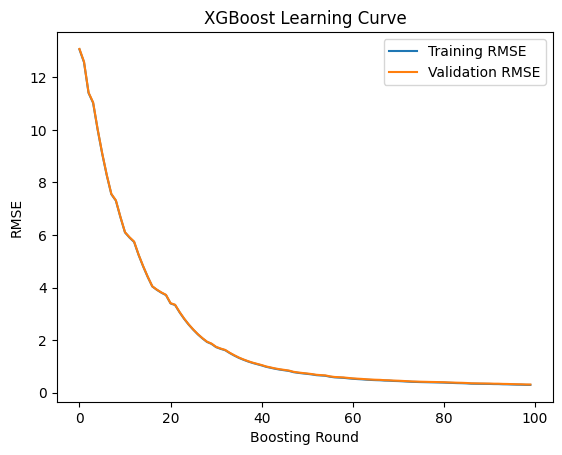

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = ap_df.drop('FinalAge', axis=1)  # Features
y = ap_df['FinalAge'].apply(np.ceil).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost regressor
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 10000
}

# Train the XGBoost model and collect evaluation metrics
evals_result = {}
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dtest, 'test')], evals_result=evals_result, verbose_eval=10)

# Plot the learning curve
train_rmse = evals_result['train']['rmse']
test_rmse = evals_result['test']['rmse']

plt.plot(train_rmse, label='Training RMSE')
plt.plot(test_rmse, label='Validation RMSE')
plt.title('XGBoost Learning Curve')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:33:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:33:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:33:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:33:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:33:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.



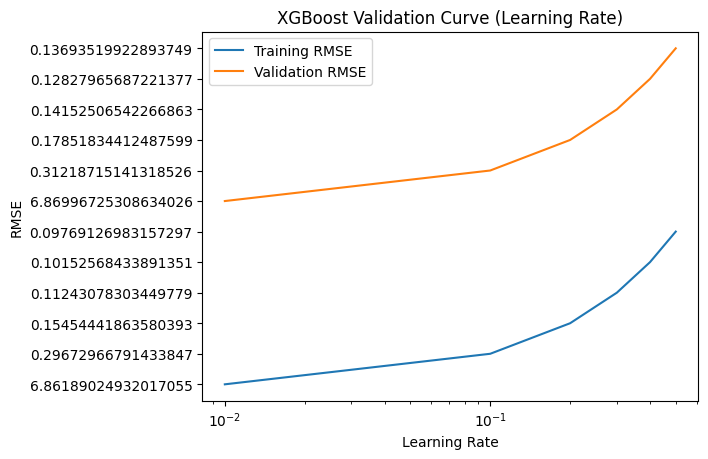

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import xgboost as xgb


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define a range of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

# Collect evaluation metrics for each learning rate
train_rmse = []
test_rmse = []

for learning_rate in learning_rates:
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': learning_rate,
        'max_depth': 5,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'n_estimators': 100
    }

    model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dtest, 'test')], verbose_eval=False)

    train_rmse.append(model.eval(dtrain).split(":")[-1])
    test_rmse.append(model.eval(dtest).split(":")[-1])

# Plot the validation curve
plt.plot(learning_rates, train_rmse, label='Training RMSE')
plt.plot(learning_rates, test_rmse, label='Validation RMSE')
plt.xscale('log')  # Use log scale for better visualization if learning rates vary widely
plt.title('XGBoost Validation Curve (Learning Rate)')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [32]:
mydata=pd.DataFrame(columns=['age', 'Diabetes_No', 'Diabetes_Pre', 'Diabetes_Yes', 'Triglyceride_High', 'Triglyceride_Normal', 'hemoglobin_sorted_High', 'hemoglobin_sorted_Low', 'hemoglobin_sorted_Normal', 'Kidney_Disease', 'Kidney_Failure', 'Kidney_Normal', 'Liver_Disease', 'Liver_Failure', 'Liver_Normal', 'Liver_vitB6 def'])
mydata.loc[0,'hemoglobin_sorted_Low']=0
mydata.loc[0,'hemoglobin_sorted_High']=0
mydata.loc[0,'hemoglobin_sorted_Normal']=1

mydata.loc[0,'Diabetes_Yes']=0
mydata.loc[0,'Diabetes_Pre']=0
mydata.loc[0,'Diabetes_No']=1

mydata.loc[0,'Kidney_Normal']=0
mydata.loc[0,'Kidney_Disease']=1
mydata.loc[0,'Kidney_Failure']=0

mydata.loc[0,'Liver_Normal']=1
mydata.loc[0,'Liver_Disease']=0
mydata.loc[0,'Liver_Failure']=0
mydata.loc[0,'Liver_vitB6 def']=0

mydata.loc[0,'Triglyceride_High']=0
mydata.loc[0,'Triglyceride_Normal']=1

mydata.loc[0,'age']=10
mydata.fillna(0,inplace=True)

In [33]:
mydata = mydata.astype(int)

In [34]:
mydata

,age,Diabetes_No,Diabetes_Pre,Diabetes_Yes,Triglyceride_High,Triglyceride_Normal,hemoglobin_sorted_High,hemoglobin_sorted_Low,hemoglobin_sorted_Normal,Kidney_Disease,Kidney_Failure,Kidney_Normal,Liver_Disease,Liver_Failure,Liver_Normal,Liver_vitB6 def
0,10,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0


In [35]:
xgb_regressor.predict(mydata)

array([25.424385], dtype=float32)

In [ ]:
from pickle import dump

In [ ]:
dump(xgb_regressor, open('SupervisedModelFinal.pkl', 'wb'))